# Sztochasztikus differenciálegyenletekkel kapcsolatos kezdetiérték feladatok

Számos alkalmazási területen találkozhatunk zajjal terhelt dinamikai rendszerekkel. Gondolhatunk például egy gerjesztett RLC áramkörre, ahol főágban a pillanatnyi áramerősséget az
$$
LI''+RI'+\frac{1}{C}I=F+\text{zaj} 
$$
differenciálegyenlet írja le, ahol $F$ a gerjesztést írja le, a zaj pedig lehet például fehérzaj, ami a Brown-mozgás klasszikus értelemben nem létező deriváltjának tekinthető (általánosított sztochasztikus folyamat). Ilyen és ehhez hasonló egyenletekkel a jeltovábbításban, pénzügyi matematikában, és sok más területen találkozhatunk. 

A zajjal terhelt dinamikai rendszerek adekvát matematikai modellje a sztochasztikus differenciálegyenlet. Az általánosított sztochasztikus folyamatokat nem használó felépítés Ito-féle integrálegyenletekre történő átírással történhet és ez magyarázza azt is, hogy az egyenletek felírásánál a "törtmentes alak" népszerűbb. Az elmélet precíz megalapozására a gyakorlat keretében nincs lehetőségünk, de az érdeklődő Olvasó az [1] jegyzetben minden szükséges információt megtalál ezzel kapcsolatban.

**Az alábbiakban kimondjuk a sztochasztikus differenciálegyenletek erős megoldásaira vonatkozó egzisztencia és unicitás tételt és numerikus módszerket mutatunk ezen egyenletek közelítő megoldásainak az előállítására.**

\begin{theorem}[Egzisztencia és unicitás]
Legyen $T>0$, $a:[0,T]\times\mathbb{R}^n\to\mathbb{R}^n$ és $b:[0,T]\times\mathbb{R}^n\to\mathbb{R}^m$ pedig mérhető függvények, melyekre valamely $C,D>0$ esetén teljesül, hogy
$$
|a(t,x)|+|b(t,x)|\le C (1+|x|);\ \ \ \ x\in\mathbb{R}^n,\ t\in [0,T]
$$
(legfeljebb lineáris növekedés) és
$$
|a(t,x)-a(t,y)| + |b(t,x)-b(t,y)| \le D |x-y|;\ \ \ \ x,y\in\mathbb{R}^n,\ t\in [0,T]
$$
(Lipschitz-folytonosság).

Ekkor tetszőleges $X_0=x_0$ esetén a
\begin{align}
d X_t &= a(t,X_t) dt + b(t,X_t)d B_t\\
  X_0 &= x_0
\end{align}
kezdetiérték feladatnak egyértelműen létezik $(X_t)_{t\in [0,T]}$ megoldása, mely
* $t$-ben $\mathbb{P}$-m.b. folytonos pályájú;
* adaptált a $(B_t)_{t\ge 0}$ standard Brown-mozgás természetes filtrációjához;
* továbbá $$\mathbb{E}\left(\int_0^T |X_t|^2 dt\right)<\infty$$.

\end{theorem}

A továbbiakban feltesszük, hogy a tekintett SDE-ek jobb oldala teljesíti a fenti (erős megoldásra vonatkozó) egzisztencia és unicitás tétel feltételeit. Ezen kívül csak skalár-értékű egyenletekkel kapcsolatos szimulációs feladatokat fogunk tekinteni.

\begin{remark}
Az egzisztencia és unicitás tétel által garantált megoldások folytonos idejű (erős értelemben vett) Markov-folyamatok. Amennyiben az egyenlet autonóm (azaz az $a$ és $b$ együtthatófüggvények explicit módon nem függnek az időtől), az is igaz, hogy a kapott Markov-folyamat időben homogén.
\end{remark}

## Numerikus módszerek

### Euler-Maruyama séma

Az Euler-Maruyama séma a közönséges differenciálegyenletek numerikus módszereiből ismert Euler-séma sztochasztikus variánsa. Legyen a megoldandó SDE-hez tartozó kezdetiérték probléma
\begin{align}
d X_t &= a(t,X_t)dt + b(t,X_t) d B_t\\
X_0 &= x_0.
\end{align}

Az Euler-Maruyama séma a fenti sztochasztikus differenciálegyenlet megoldását a $t_0= 0< t_1<t_2,\ldots, <t_N=T$ osztópontokban a
\begin{align}
 Y_{t_{n+1}} &= Y_{t_{n}} + a(t_{n},Y_{t_{n}})(t_{n+1}-t_{n}) + b(t_{n},Y_{t_{n}}) \sqrt{t_{n+1}-t_{n}}\xi_{n+1}\\
Y_0 &= x_0,
\end{align}
Markov-lánccal közelíti, ahol $(\xi_{n})_{n\in\mathbb{N}}$ független, standard normális eloszlású valószínűségi változók sorozata.

\begin{remark}
A determinisztikus Euler módszerrel ellentétben az Euler-Maruyama sémát elterjedten használják SDE-ek megoldására. Ezen kívül elméleti jelentősége is van, mert számos SDE-ekkel kapcsolatos tétel bizonyításánál azt az utat követik, hogy az Euler-Maruyama közelítére látják be az állítást diszkrét idejű Markov-láncokra kifejlesztett technikákkal, majd a lépésköz csökkentésével "átjátszák" az eredeti SDE-re.
\end{remark}

In [1]:
import numpy as np

def Euler_Maruyama(a, b, x0, tspan)->np.ndarray:
    """
    a és b a (skalár értékű) együtthatófüggvények, x0 a kezdeti érték, 
    tspan pedig az osztópontok vektora, ami szig. mon. növő
    """
    
    N = tspan.size
    X = np.zeros((N,))
    
    xi = np.random.normal(0.0, 1.0, N)
    
    X[0] = x0
    for k in range(1,N):
        X[k] = X[k-1] + a(tspan[k-1],X[k-1])*(tspan[k]-tspan[k-1]) + b(tspan[k-1],X[k-1])*np.sqrt(tspan[k]-tspan[k-1])*xi[k]
        
    return X

Legyen $a,b\in\mathbb{R}$ tetszőleges. A $d X_t = \frac{b-X_t}{1-t} dt + dB_t$; $0\le t < 1$, $X_0=a$ kezdeti érték feladat megoldását Brown-hídnak nevezik. Azért híd, mert az $a$ és $b$ pontokat köti össze. A következő kódrészlet ezen megoldás egy realizációját közelíti a fenti Euler-Maruyama séma segítségével.

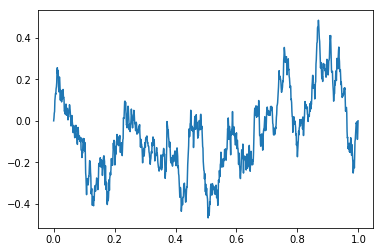

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.0
b = 0.0

A = lambda t, x: (b-x)/(1-t)
B = lambda t, x: 1.0

x0 = a
N = 1000
tspan = np.arange(0.0,1.0,1/N)

X = Euler_Maruyama(A, B, x0, tspan)

plt.plot(tspan, X)

### Milstein módszer

Az Euler-Maruyama sémánál kedvezőbb tulajdonságokkal rendelkezik a Milstein módszer (az ún. Erős konvergencia rendje $\Delta t$, míg az Euler-Marayuma iterációé csak $\sqrt{\Delta t$}, de ezt itt nem részletezzük). Hátránya viszont, hogy csak autonóm egyenletek megoldására alkalmas.

Az iterációs lépés:
$$
Y_{t_{n+1}} = Y_{t_{n}} + a(Y_{t_{n}})(t_{n+1}-t_{n}) + b(Y_{t_{n}}) \sqrt{t_{n+1}-t_{n}}\xi_{n+1}+\frac{1}{2}b(Y_{t_{n}})^2 (t_{n+1}-t_{n})(\xi_{n+1}^2-1)
$$

**Feladat:** Programozzuk le a Milstein módszert és próbáljuk ki egy tetszőleges SDE-en.

### SDE Runge-Kutta módszer

Hasonló tulajdonságai vannak a sztochasztikus Runge-Kutta módszernek, ahol az iterációs lépés:
\begin{align}
Z_{t_{n}} &= Y_{t_{n}} + a(Y_{t_{n}})(t_{n+1}-t_{n})+b(Y_{t_{n}})\sqrt{t_{n+1}-t_{n}}\\
Y_{t_{n+1}} &= Y_{t_{n}} + a(Y_{t_{n}})(t_{n+1}-t_{n})+b(Y_{t_{n}})\sqrt{t_{n+1}-t_{n}}\xi_{n+1}+\frac{1}{2}(b(Z_{t_{n}})-b(Y_{t_{n}}))(\xi_{n+1}^2-1)\sqrt{t_{n+1}-t_{n}}
\end{align}

**Feladat:** Programozzuk le a sztochasztikus Runge-Kutta módszert és próbáljuk ki egy tetszőleges SDE-en.

## Konkrét példák

### Geometriai Brown-mozgás

A pénzügyi matematika úttörői közé tartozó Bachelier 1900-ban “Théorie de la spéculation” című dolgozatában Brown-mozgással modellezte az opciók árát, ami nem realisztikus, hiszen a Brown-mozgás lehet negatív is, ami az árakról nem mondható el. Samuelson 1965-ben az ármozgások leírására geometriai Brown-mozgást javasolt, ami aztán mint egyfajta basic árfolyam modell számos területen felbukant (lásd pl: Black-Scholes modell).

A geometriai Brown-mozgás a
$$
d X_t = \mu X_t dt + \sigma X_t dB_t
$$
SDE megoldásaként adódik, ahol $\mu\in\mathbb{R}$ a globális trendnek felel meg, $\sigma>0$ pedig a volatilitás, ami az árfolyam ingadozásának mértékét jellemzi.

**Feladat:** Tetszőleges solvert használva oldjuk meg a fenti SDE-et.

### Mean-reverting árfolyam modell

A nyersanyag piacok (commodity markets) egyik sajátossága, hogy az árfolyam rövid időtávon (igen, ez szubjektív) egy középérték körül oszcillál. Ezt a viselkedést hívják mean-reversion-nek (magyar megfelelőt nem ismerek), és ezt a viselkedést mutatja az ún. mean-reverting Ornstein-Uhlenbeck folyamat, mely a
$$
d X_t = (m-X_t)dt+\sigma dB_t
$$
sztochasztikus differenciálegyenlet megoldása, ahol $m,\sigma>0$, $(B_t)_{t\ge 0}$ pedig a standard Brown-mozgás.

**Feladat:** Az $m$ és $\sigma$ paraméterek tetszőleges megválasztása mellett szimuláljuk az $(X_t)_{t\ge 0}$ folyamatot. A szimulációhoz bármelyik fenti numerikus sémát használhatjuk.

**Feladat:** A vasérc árfolyama 10 éves időtávon is mean-reverting viselkedést mutat $m=145.5$ $/t középértékkel. ![Vasérc](./iron_ore.png) 

Tegyük fel, hogy az árfolyam a fenti egyenletet követi, a volatilitás pedig az egyszerűség kedvéért $\sigma=1.0 \frac{\$}{\sqrt{\text{Day}}}$ legyen. Tegyük fel továbbá, hogy egy vasérc kitermelő vállalat döntéshozói vagyunk és kaptunk egy megkeresést egy acélműtől miszerint vásárolnának tőlünk vasércet 1 év múlva 155 $/t
áron 

(ezt hívják határidős ügyletnek, más néven futures contract), a mai ár pedig $150.0$ $/t. Az ilyen megállapodások arra valók, hogy előre biztosítsák az acélmű nyersanyag ellátását. *A kérdés az, hogy várhatóan mekkora lesz a nyeresége/vesztesége a vasérc kitermelő vállalatnak ahhoz képest mintha a piacon értékesített volna?*

A kérdés megválaszolásához az Euler--Maruyama diszkretizációt használva, 1 napos lépésközzel, $X_0 = 150.0$ $/t-ból kiindulva 

szimuláljunk 100 egymástól független scenáriót és nézzük meg, hogy kapott 100 db $X_{365}$ érték átlaga mennyivel nagyobb vagy kisebb a határidős árnál.

### Sztochasztikus populáció növekedési modell

Egy populációban az egyedek szaporodóképességét az $r>0$, a terület eltartóképességét pedig a $K>0$ paraméter jellemzi. A populáció egyedszáma a
$$
dX_t = r X_t(K-X_t)dt+\beta X_t dB_t
$$
egyenlet megoldása, ahol $X_0=x_0>0$ és a $\beta>0$ paraméter a populáció egyedszámának ingadozását méri.

**Feladat:** Tetszőleges solvert használva oldjuk meg a fenti egyenletet.

# További olvasnivalók

1. http://www.stat.ucla.edu/~ywu/research/documents/StochasticDifferentialEquations.pdf (Az alapmű :-D)
2. https://drive.google.com/drive/folders/0B4-1PUjyOBqYLUl5Z2E1T1lJRGM?resourcekey=0-NLXjggg15HPQekB6k2j6bQ (Tóth Bálint Sztochasztikus diffegyenletek kurzusa)
3. https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method
4. https://en.wikipedia.org/wiki/Milstein_method
5. https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_method_(SDE)
6. https://www.mimuw.edu.pl/~apalczew/CFP_lecture5.pdf
7. https://www.wias-berlin.de/people/bayerc/files/euler_talk_handout.pdf